importing libraries


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA COLLECTION

In [27]:
df = pd.read_csv("EV_Dataset (1).csv")
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [28]:
df.head(10)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
5,2014.0,jan,1/1/2014,Andhra Pradesh,CASH VAN,Others,Others,0.0
6,2014.0,jan,1/1/2014,Andhra Pradesh,CRANE MOUNTED VEHICLE,Others,Others,0.0
7,2014.0,jan,1/1/2014,Andhra Pradesh,EDUCATIONAL INSTITUTION BUS,Bus,Institution Bus,0.0
8,2014.0,jan,1/1/2014,Andhra Pradesh,EXCAVATOR (COMMERCIAL),Others,Others,0.0
9,2014.0,jan,1/1/2014,Andhra Pradesh,FORK LIFT,Others,Others,0.0


DATA PREPROCESSING

In [29]:
df.shape

(96845, 8)

In [30]:
df['Year']

0        2014.0
1        2014.0
2        2014.0
3        2014.0
4        2014.0
          ...  
96840    2023.0
96841    2023.0
96842    2023.0
96843    2023.0
96844    2023.0
Name: Year, Length: 96845, dtype: float64

In [31]:
df.State.value_counts() # almost every state and UT are present in the data.

State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chan

In [32]:
df.Vehicle_Category.value_counts() # Below are the category of vehicles being sold in Indian markets.

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

In [33]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [34]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

EXTRACTING TARGETS

In [35]:
# Pie Chart for Vehicle Category Distribution
labels = df['Vehicle_Category'].value_counts().index.tolist()

size = df['Vehicle_Category'].value_counts().values

In [36]:
# Custom colors for the pie chart
colors = sns.color_palette("cool", len(labels))  # Cool color palette for variety

explode = [0.1 if i == 0 else 0 for i in range(len(labels))]  # Emphasize the first category

(np.float64(-1.203016155656586),
 np.float64(1.1049054986426383),
 np.float64(-1.1203096111161777),
 np.float64(1.1009671243388657))

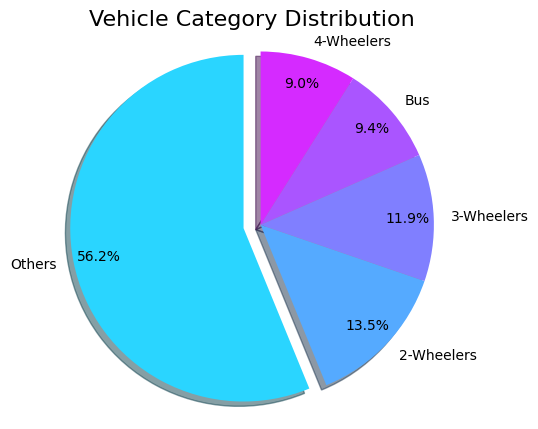

In [37]:
plt.rcParams['figure.figsize'] = (5, 5)  # Increase figure size for better spacing

plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True,

        autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)
plt.title('Vehicle Category Distribution', fontsize=16)

plt.axis('equal')  # Ensure pie is draw

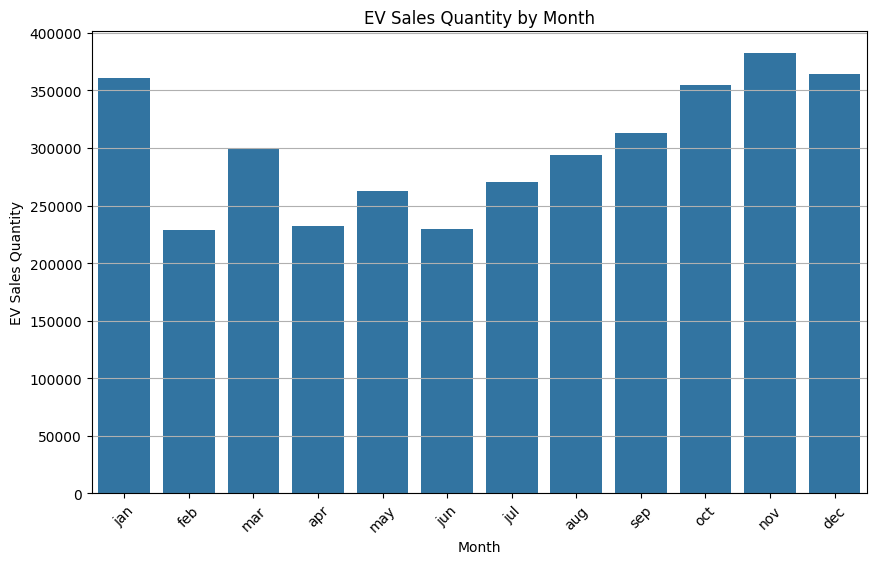

In [38]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='Month_Name', y='EV_Sales_Quantity', estimator=sum, errorbar=None)

plt.title('EV Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


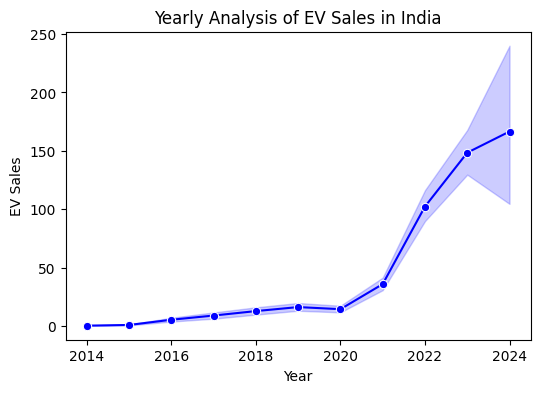

In [39]:
plt.figure(figsize=(6,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales');

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

K MEANS

In [41]:
# Group by 'State' and aggregate 'Electric_Vehicle_Sales_Quantity'
state_ev_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()

# Handle missing values in Electric_Vehicle_Sales_Quantity if any
imputer = SimpleImputer(strategy='mean')
state_ev_sales['EV_Sales_Quantity'] = imputer.fit_transform(state_ev_sales[['EV_Sales_Quantity']])

# Feature scaling: Normalize EV sales quantity (and other features if available)
scaler = StandardScaler()
state_ev_sales['EV_Sales_Quantity_Scaled'] = scaler.fit_transform(state_ev_sales[['EV_Sales_Quantity']])

# Determine optimal number of clusters using the elbow method
sse_values = []
cluster_options = range(1, 11)

for num_clusters in cluster_options:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
    kmeans.fit(state_ev_sales[['EV_Sales_Quantity_Scaled']])
    sse_values.append(kmeans.inertia_)

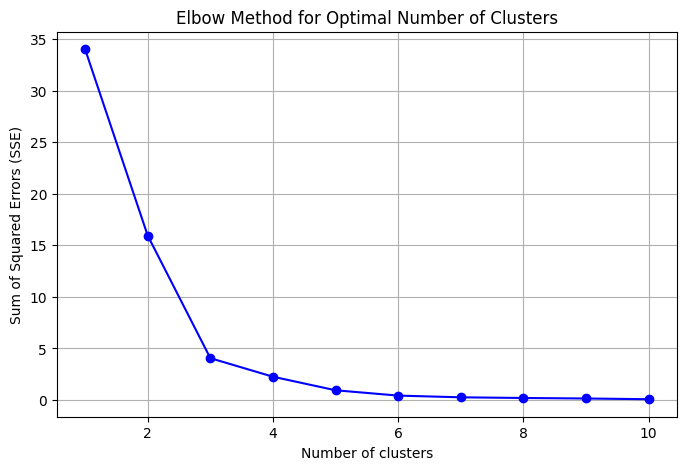

In [42]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_options, sse_values, 'bo-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [43]:
# Choose the optimal number of clusters (e.g., where the elbow occurs, let 3)
optimal_cluster_count = 3

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_cluster_count, init='k-means++', random_state=0)
state_ev_sales['cluster_label'] = kmeans.fit_predict(state_ev_sales[['EV_Sales_Quantity_Scaled']])

# Evaluate the quality of clusters using silhouette score
silhouette_avg_score = silhouette_score(state_ev_sales[['EV_Sales_Quantity_Scaled']], state_ev_sales['cluster_label'])
print(f'Silhouette Score for {optimal_cluster_count} clusters: {silhouette_avg_score}')

# Display cluster assignments
print("Cluster Labels for States:\n", state_ev_sales['cluster_label'].value_counts())
print("Inertia:", kmeans.inertia_)
print("Iterations:", kmeans.n_iter_)

Silhouette Score for 3 clusters: 0.6660969359143741
Cluster Labels for States:
 cluster_label
0    25
2     8
1     1
Name: count, dtype: int64
Inertia: 4.063141465772248
Iterations: 5


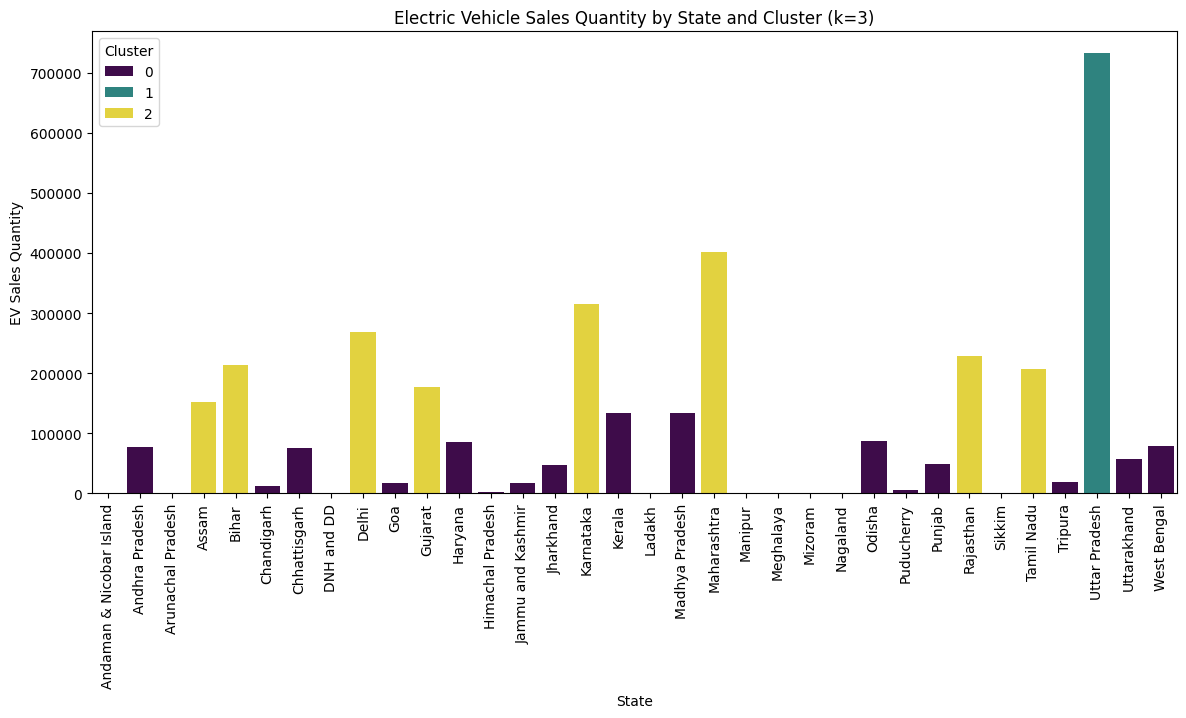

In [44]:
#Plot the clustered states by EV sales quantity
plt.figure(figsize=(14, 6))
sns.barplot(data=state_ev_sales, x='State', y='EV_Sales_Quantity', hue='cluster_label', palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Electric Vehicle Sales Quantity by State and Cluster (k={optimal_cluster_count})')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Cluster')
plt.show()

In [21]:
#Analyze cluster segments
cluster_mean_sales = state_ev_sales.groupby('cluster_label')['EV_Sales_Quantity'].mean().reset_index()
print(cluster_mean_sales)

   cluster_label  EV_Sales_Quantity
0              0          35943.840
1              1         732074.000
2              2         245392.625


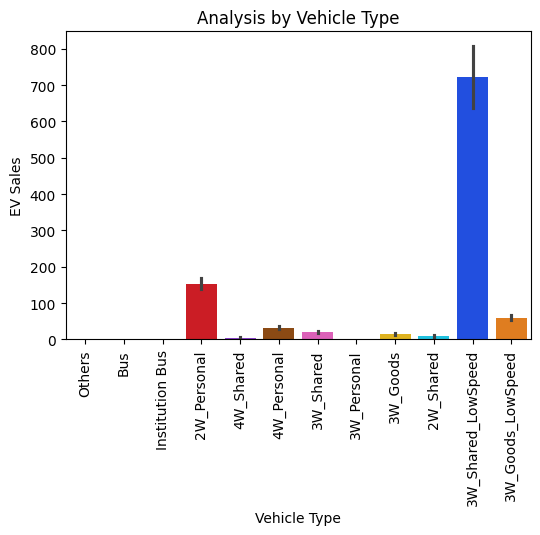

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=df, hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);